In [9]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.misc import *

In [10]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [16]:
def detect_faces(img):
    rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(rgbimg, cv2.COLOR_RGB2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.cv.CV_HAAR_SCALE_IMAGE
    )
    print("Found {0} faces!".format(len(faces)))
    faces_ = np.zeros((len(faces), 48, 48, 3))
    for i, (x, y, w, h) in enumerate(faces):
        cv2.rectangle(rgbimg, (x, y), (x+w, y+h), (0, 255, 0), 2)
        faces_[i] = imresize(rgbimg[y:y+h, x:x+w], (48, 48))
    return faces_

Found 4 faces!


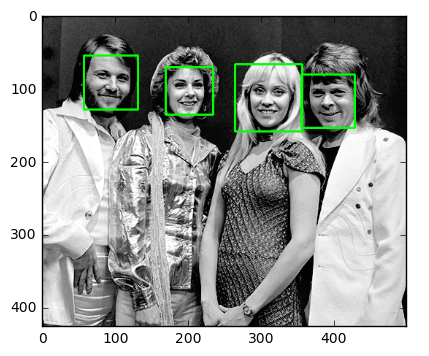

In [17]:
faces = cv2.imread('abba.png')
# plt.imshow(detect_faces(img))